# Compiles all Sources of COP vs. Outdoor Temperature and Plots them

In [2]:
import pandas as pd
import numpy as np

import altair as alt

In [3]:
# File names of the pickled DataFrames containing the data
files = (
    #'temp_cop_manuf_max.pkl',
    'temp_cop_manuf_varying.pkl',
    '../field_studies/kaluza/temp_cop_kaluza.pkl',
    '../field_studies/kaluza/temp_cop_kaluza_remote.pkl',
    '../field_studies/cchrc_2015/temp_cop_cchrc_dillingham.pkl'
)
df = None
for fn_pkl in files:
    if df is None:
        df = pd.read_pickle(fn_pkl)
    else:
        df = pd.concat([df, pd.read_pickle(fn_pkl)])
df

,cop,field_study,hspf,source,temperature
0.0,2.276667,False,NaN,"Manuf Spec, Varying Load",5.000000
1.0,2.609744,False,NaN,"Manuf Spec, Varying Load",17.000000
2.0,5.481243,False,NaN,"Manuf Spec, Varying Load",47.000000
1.0,2.203241,True,13.4,"Seward, Kaluza",9.323181
2.0,2.210258,True,13.4,"Seward, Kaluza",12.532493
3.0,2.345697,True,13.4,"Seward, Kaluza",17.358148
4.0,2.617557,True,13.4,"Seward, Kaluza",23.870238
5.0,2.749132,True,13.4,"Seward, Kaluza",26.894927
6.0,2.509495,True,13.4,"Seward, Kaluza",32.873171
7.0,2.288342,True,13.4,"Seward, Kaluza",36.892772


In [4]:
# define the theme by returning the dictionary of configurationsa
def larger():
    return {
        'config': {
            'view': {
                'height': 350,
                'width': 525,
            },
            'axis': {
                'labelFontSize': 14, 
                'titleFontSize': 16
            },
            'legend': {
                'labelFontSize': 12, 
                'titleFontSize': 14
            },
        }
    }

# register the custom theme under a chosen name
alt.themes.register('larger', larger)

# enable the newly registered theme
alt.themes.enable('larger')

ThemeRegistry.enable('larger')

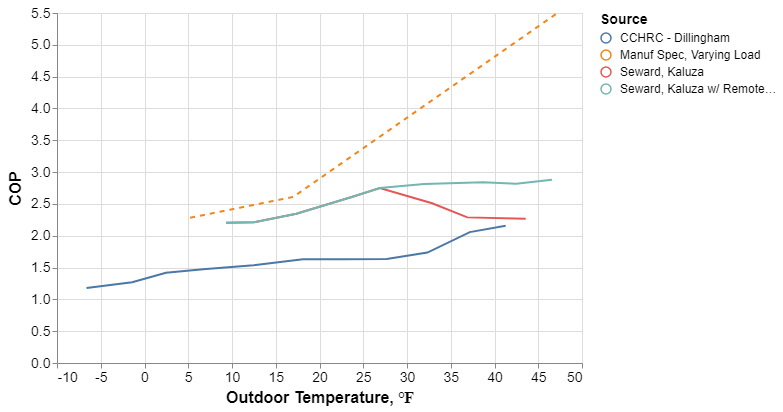

In [5]:
line1 = alt.Chart(df.query('field_study == True')).mark_line().encode(
    x = 'temperature',
    y = 'cop',
    color = 'source:N',
    #opacity = 'Selected:N',
)
line2 = alt.Chart(df.query('field_study == False')).mark_line(strokeDash=[5,5]).encode(
    x = alt.X('temperature', axis=alt.Axis(title='Outdoor Temperature, ℉')),
    y = alt.Y('cop', axis=alt.Axis(title='COP')),
    color = alt.Color('source:N', legend=alt.Legend(title="Source")),
    #opacity = 'Selected:N',
)
line1 + line2